In [2]:
# Use of IPython.display and HTML for using css to format text in Markdown based on
# www.dataquest.io/blog/advanced-jupyter-notebooks-tutorial
from IPython.display import HTML
HTML(
    "<style>\
    span.str {color:#BA2121; font-style:italic; font-weight:bold;}\
    span.num {color:#080; font-style:italic; font-weight:bold;}\
    span.bltn {color:#080; font-weight:bold;}\
    span.op {color:#AA22FF;}\
    span.func {color:#00F; font-weight:bold;}\
    h3.yt {color:#009900; font-style:italic;}\
    span.yt {color:#009900; font-style:italic;}</style>"
)



<h2><b><u>Case Study: Online Data in BeautifulSoup</u></b></h2>

<h3><b><i>Background</i></b></h3>
It is important to learn how to access data sources that are stored online. Most of the data you've encountered in this course so far was originally found online. In this Case Study, you'll practice accessing <b><i>data hosted online</i></b> using libraries and solutions based on what you've learned from DataCamp's <a href = "https://learn.datacamp.com/courses/intermediate-importing-data-in-python"> Intermediate Importing Data in Python</a>. You'll also expand your knowledge by working with different datasets and the <b><i>Socrata Open Data API</i></b>. 

<h3><b><i>Goal</i></b></h3>
The goal of this Case Study is to become more familiar with accessing <b><i>data hosted online</i></b> using Python. This can be divided into several components.
<ul>
    <li>Requesting online resources such as <b><i>webpages</i></b> using <b><i>urllib and requests libraries</i></b>. Working with the request's returned <b><i>HTML</i></b> results using <b><i>BeautifulSoup</i></b>.</li>
    <li>Requesting online resources through a <b><i>REST endpoint</i></b> using the <b><i>requests</i></b> library. Working with the returned <b><i>JSON</i></b> result using <b><i>pandas</i></b>.</li>
    <li>Requesting online resources through a <b><i>REST endpoint</i></b> using <b><i>urlopen</i></b>. Working with the returned <b><i>file-type data</i></b> and converting it to a <b><i>pandas DataFrame</i></b>.</li>
    <li>Using an <b><i>API</i></b> to access a dataset. You will use the <b><i>Socrata Open Data API</i></b> and the <b><i>sodapy</i></b> library to access the data.</li>
</ul>

<h3><b><i>Data</i></b></h3>
You will work with two different data resources in this Case Study. The first is the <b><i>University of Arkansas's Undergraduate Catalog Data Science (DTSC) webpage</i></b> [1]. The second is <b><i>New York State Energy Research and Development Authority (NYSERDA) Estimated Gasoline Sales: Beginning 1995 dataset</i></b> [2]. This dataset contains the estimated yearly amount of gasoline sales by thousands of gallons per county in New York. You will download the <b><i>Estimated Gasoline Sales</i></b> data in <b><i>JSON</i></b> format, practice extracting and formatting the necessary data from the <b><i>JSON object</i></b>, and analyze this data. You will also practice using <b><i>APIs</i></b> by accessing the <b><i>Estimated Gasoline Sales</i></b> data through its <b><i>Socrata Open Data API</i></b> endpoint. The <b><i>Socrata Open Data API</i></b> is chosen for this Case Study because it does not require you to sign up for an <b><i>API key</i></b> to access public data through it. 
    
<h3><b><i>Additional Requirements</i></b></h3>
If you do not already have the <b><i>sodapy</i></b> Python library installed, you will need to install it using <b><i>pip</i></b>. Installation instructions can be found at <a href="https://pypi.org/project/sodapy/">PyPi</a>. 
  
Sources: 
<ol style = "font-size:8px">
    <li>University of Arkansas. 2021. Data Science (DTSC). 2021-2022 Catalog. https://catalog.uark.edu/undergraduatecatalog/collegesandschools/interdisciplinarystudies/datasciencedasc/. </li>
    <li>New York State Energy Research and Development Authority. 2021. "Estimated Gasoline Sales: Beginning 1995". https://data.ny.gov/Energy-Environment/Estimated-Gasoline-Sales-Beginning-1995/cwrk-j5nn. </li>
</ol>



<h3> Using HTTP and HTML</h3>
In the section below, you will practice requesting and accessing internet resources through <b><i>HTTP requests</i></b>. We will use two different libraries for this, <b><i>urllib</i></b> and <b><i>requests</i></b>. The <b><i>BeautifulSoup</i></b> package from <b><i>bs4</i></b> will be used to parse and format the <b><i>requests</i></b>. 

The <span class="bltn">import</span> statements below have been completed for you. Notice that we will not <span class="bltn">import</span> everything from <b><i>urllib</i></b>. Only the <b><i>Request, URLError</i></b> and <b><i>HTTPError</i></b> classes and the <b><i>urlopen</i></b> function will be used. 

<h4><u>Import Statements</i></h4>

In [3]:
# Import
from urllib.request import Request, urlopen
from urllib.error import URLError, HTTPError 

import requests
from bs4 import BeautifulSoup

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


<h4><u>Requesting a URL with Urllib</u></h4>

In the code cell below, a <span class="str">string uark_url</span> is created which specifies the <b><i>url</i></b> to access Data Science page in the University of Arkansas's Undergraduate Catalog. A <b><i>Request</i></b> object is created and <span class = "str">uark_url</span> is passed in the constructor. Next, <b>urlopen</b> is used to send the request to the server and the <b><i>response</i></b> is stored. The contents of the response are then read into a variable <b><i>html_page</i></b> using <b><i>urlopen's</i></b> <b>read</b> method. The <b><i>html_page</i></b> variable is then <span class="bltn">printed</span> and the <b><i>request</i></b> closed using <b><i>urllib's</i></b> <b>close</b> method. It is good practice to close the <b><i>HTTP</i></b> connection when done. 

Sometimes there might be an error with how an <b><i>HTTP request</i></b> is formatted or with the server the request is being made to. In order to handle potential errors, <span class="bltn">try and except</span> blocks are used. You do not have to understand the particular errors handled at this point. If interested, more information on <b><i>HTTPError</i></b> and <b><i>URLError</i></b> can be found <a href = "https://docs.python.org/3/howto/urllib2.html#handling-exceptions"> here </a>.

As you practice more with making HTTP requests, it is important to remember to <b><i>avoid spamming a server with multiple repeated requests.</i></b>


In [39]:
# Try and except error handling based on usage in: https://docs.python.org/3/howto/urllib2.html

# String of the URL to open. 
uark_url = "https://catalog.uark.edu/undergraduatecatalog/collegesandschools/interdisciplinarystudies/datasciencedasc/"

# Create Request object and pass the uark_url to it. 
req = Request(uark_url)

try:
    # Open the url (Send HTTP request) using urlopen(req)
    response = urlopen(req)
    
    # Read in the html page using response.read()
    html_page = response.read()

    # Print the returned response html_page
    print(html_page)
    # Terminate connection using response.close()
    response.close()
    
except HTTPError as e:
    print("HTTP Error: ", e.code)
except URLError as e:
    print("URL Error: ", e.reason)

b'<!doctype html>\n<html xml:lang="en" lang="en" dir="ltr">\n\n<head>\n<title>Data Science (DTSC) &lt; University of Arkansas</title>\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n<meta name="google-site-verification" content="Lk5jLhOJuM7gcjWytiaI2KaOmfRGXrRKxwLrBEUXI_w" />\n<meta name="description" content="The interdisciplinary Bachelor of Science in Data Science will prepare students for a successful career in data science with options to pursue one of ten concentrations." />\n<meta name="keywords" content="Data Science, data analytics, accounting analytics, bioinformatics, biomedical informatics, healthcare informatics, business data, computational analytics, geospatial data, operations analytics, social data analytics, supply chain analytics, data, DASC, DTSC" />\n<link rel="search" type="application/opensearchdescription+xml"\n\t\t\thref="/search/opensearch.xml" title="Catalog" />\n<meta name="viewport" content="width=device-width, initial-scale=1.0, min

<h4><u>Requesting a URL with Requests and Parsing with Beautiful Soup</u></h4>

In the code below, you will use <b><i>BeautifulSoup</i></b> and <b><i>Request</i></b> libraries to extract data from the web page specified by <span class="str">uark_url</span>. The <b>get</b> method is used to make a <b><i>HTTP GET request</i></b> by passing in the variable <span class="str">uark_url</span>. The variable <b><i>html_page</i></b> stores the response and the <b><i>request</i></b> is closed using the <b>close</b> method. 

A <b><i>BeautifulSoup</i></b> object, (<b><i>soup_obj)</i></b>, is created and <b><i>html_page</i></b> is specified as the the <b><i>url response</i></b> to parse. The type of <b><i>parser</i></b> to use is specified as <span class="str">html.parser</span>. This tells the <b><i>BeautifulSoup</i></b> object to parse the response as HTML. Instead of viewing the HTML as one long string, the <b><i>Beautiful Soup class</i></b> <b>prettify</b> method is used to convert the parsed HTML into a human readable format including indentations and new lines. 

The <b><i>BeautifulSoup</i></b> code in this Case Study was developed using the <a href = "https://www.crummy.com/software/BeautifulSoup/bs4/doc/"> BeautifulSoup Documentation</a> as reference. The documentation page is a good place to start for finding out how-to use <b><i>BeautifulSoup</i></b> to parse a webpage. 

In [5]:
# Create a HTTP GET request using requests.get() with the uark_url string. Store the returned response in the req variable. 
req = requests.get(uark_url)

In [6]:
# Begin a new cell to avoid accidentally making the same request multiple times. 
# Access the contents of the response  by specifying text encoding (Hint: .text)
html_page = req.text

# Close the request 
req.close() 

# Create BeautifulSoup object and pass the text response. Hint: BeautifulSoup(html_page, 'html.parser')
soup_obj = BeautifulSoup(html_page, 'html.parser')

# Access the BeautifulSoup object's contents and display in an easy-to-read format using .prettify()
pr_soup_obj = soup_obj.prettify

# Print the prettify() result
print(pr_soup_obj)

<bound method Tag.prettify of <!DOCTYPE html>

<html dir="ltr" lang="en" xml:lang="en">
<head>
<title>Data Science (DTSC) &lt; University of Arkansas</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="Lk5jLhOJuM7gcjWytiaI2KaOmfRGXrRKxwLrBEUXI_w" name="google-site-verification"/>
<meta content="The interdisciplinary Bachelor of Science in Data Science will prepare students for a successful career in data science with options to pursue one of ten concentrations." name="description"/>
<meta content="Data Science, data analytics, accounting analytics, bioinformatics, biomedical informatics, healthcare informatics, business data, computational analytics, geospatial data, operations analytics, social data analytics, supply chain analytics, data, DASC, DTSC" name="keywords"/>
<link href="/search/opensearch.xml" rel="search" title="Catalog" type="application/opensearchdescription+xml"/>
<meta content="width=device-width, initial-scale=1.0, minimum-scale

<h4><u>Accessing HTML Elements using BeautifulSoup</u></h4>

Now that we have the contents of the web page, let's extract some data. First we'll extract <b><i> HTML title tag (element)</i></b> of the web page by specifying the <b><i>.title</i></b> attribute and <span class="bltn">print</span> the result. The term <b><i>HTML tag</i></b> corresponds to the <b><i>"\<title>\"</i></b> and <b><i>"\</title>\"</i></b> as the start and end tag respectively, while the term <b><i>HTML element</i></b> indicates the starting title tag, the text between the tags, and the ending title tag . If you'd like to learn more about differnt HTML elements, the <a href = "https://www.w3schools.com/html/html_elements.asp">W3 School's HTML Elements</a> is a good starting point. 

In [7]:
# Print the title element of the web page using soup_obj.title
print(soup_obj.title)

<title>Data Science (DTSC) &lt; University of Arkansas</title>


The result of the code cell above, returns the full <b><i>HTML element</i></b> including beginning and ending <b><i>title tags</i></b>. What if you just want to return the text between the tags? In that case, you can use <b><i>.text</i></b> after the <b><i>title</i></b> title attribute. Repeat the code in the cell above, but add <b><i>.text</i></b> to the end of <b><i>title</i></b>.

In [8]:
# Print the contents  of the title element with .text
print(soup_obj.title.text)

Data Science (DTSC) < University of Arkansas


<h4><u>Parsing Multiple Tags in Beautiful Soup</u></h4>

In the example above, you worked with a single tag. However, tags can be repeated many times on an HTML page. In the code cell below, the <b>find</b> method is used to first find the <b><i>div tag</i></b> with the unique <b><i>id</i></b> of <span class="str">textcontainer</span> and store its contents in the variable <b><i>sel_div</i></b>. Within this <b><i>div</i></b>, the <b><i>li</i></b> tag occurs multiple times within the <b><i>ul</i></b> tag. First, the <b><i>ul</i></b> tag is searched for in <b><i>sel_div</i></b> using the find method, then all instances of <b><i>li</i></b> within <b><i>ul</i></b> are searched for and returned as a <span class="bltn">list</span> stored in the variable <b><i>li_tags</i></b>. Finally each <b><i>li</i></b> element extracted is iterated over with a <span class="bltn">for</span> loop and the contents between the <b><i>li</i></b> tag printed using <span class="bltn">print</span> and <b>.text</b>. 

The results of <b><i>parsing</i></b> show <span class="num">6</span> skills you will learn as part of the Data Science program. 

In [9]:
# Print some of the skills you will learn as part of the Data Science program. 
# Find the div tag with textcontainer as the id. 
sel_div = soup_obj.find(id = "textcontainer")

# The first instance of an unordered list tag within the sel_div. Within that ul tag find all li tags. 
li_tags = sel_div.find("ul").find_all("li")

# Print each item in the li_tagslist. Use a For loop
for item in li_tags:
    print(item.text, '\n')

Use and apply state-of-the-art technologies for data representation, retrieval, manipulation, storage, governance, understanding, analysis, privacy, and security. 

Develop descriptive, predictive and prescriptive models to abstract complex systems and organizational problems, and to use computational methods to draw data-supported conclusions. 

Use foundational knowledge and apply critical thinking skills to identify and solve problems, make decisions, and visualize data, all with an awareness of societal and ethical impacts. 

Adapt analytics concepts to interpret and communicate findings and implications to senior decision-makers. 

Work effectively in an interdisciplinary team and transfer findings between knowledge domains and to others with no domain experience. 

Communicate using technical and non-technical language in writing and verbally. 



<h3>Working with JSON data</h3>
In this section you will work with importing data in <b><i>JSON</i></b> format and the <b><i>requests</i></b> library.

<h4><u>Requesting JSON data with Requests</u></h4>

Making a <b><i>request</i></b> to a server to return <b><i>JSON</i></b> is very similar to the requests you previously made. The <b><i>requests</i></b> library is used to send a <b><i>GET</i></b> request using the <b>get</b>method. The variable <span class="str">gas_url</span> stores a string specifying that the server (data.ny.gov) return the results of the specified resource (cwrk-j5nn) of the <b><i>GET</i></b> request as <b><i>JSON</i></b>. 

The returned result from the server is then decoded into <b><i>JSON</i></b> format using the <b>json</b> method. The request to the server is then closed using the <b>close</b> method. 

In [10]:
# URL 
gas_url = "https://data.ny.gov/api/views/cwrk-j5nn/rows.json?accessType=DOWNLOAD"

# Open request and store response in traffic_res by using request.get(gas_url)
gas_res = requests.get(gas_url)

# Decode as json using gas_res.json()
gas_json = gas_res.json()

# Close response
gas_res.close()

Once the <b><i>response</i></b> to the <b><i>request</i></b> has been returned and the connection closed, the resulting <b><i>JSON</i></b> data can be worked with. A new code cell is created below to prevent running the same <b><i>GET</i></b> request multiple times unnecessarily. Let's take a look at the <span class="bltn">type</span> of data the request returned and <span class="bltn">print</span> the result. Also <span>print</span> the <b><i>JSON</i></b> data. 

In [11]:
# # Begin a new cell to avoid accidentally making the same request multiple times. # # 

# Print the data type of gas_json. Note that it is a dictionary. 
print(type(gas_json))
# Print traffic_json. 
print(gas_json)

<class 'dict'>
{'meta': {'view': {'id': 'cwrk-j5nn', 'name': 'Estimated Gasoline Sales: Beginning 1995', 'assetType': 'dataset', 'attribution': 'New York State Energy Research and Development Authority', 'attributionLink': 'http://www.nyserda.ny.gov/Energy-Prices-Data-and-Reports/Energy-Statistics-and-Weather-Data/Energy-Statistics.aspx', 'averageRating': 0, 'category': 'Energy & Environment', 'createdAt': 1362435052, 'description': 'Estimated gasoline sales data is derived from New York StateDepartment of Taxation and Finance data on gasoline sales andgasoline sales tax collections. Gasoline sales data is estimated for eachcounty with the exception that individual county data for New YorkCity is not available. Data is weighted for regional price differencesand differing county tax rates.\n\nHow does your organization use this dataset? What other NYSERDA or energy-related datasets would you like to see on Open NY? Let us know by emailing OpenNY@nyserda.ny.gov.', 'displayType': 'table',

<h4><u>Working with Requests JSON Response</u></h4>

The results of the code cell above show that the decoded <b><i>JSON</i></b> data stored in the variable <b><i>gas_json</i></b> from using <b><i>Requests</i></b> <b>.json</b> method is stored as a Python <span class="bltn">dictionary</span>. Let's see what <b><i>keys</i></b> the dictionary has using the <b>.keys()</b> method. 

In [12]:
# Print the keys in gas_json
print(gas_json.keys())

dict_keys(['meta', 'data'])


The <span class="bltn">dictionary</span> <b><i>gas_json</i></b> has two keys. The <b><i>values</i></b> for both were examined outside of this Case Study and the key <span class="str">data</span> is the one we need to use to be able to access the actual data of interest. If you're interested in seeing <b><i>values</i></b> of the <span class="str">meta</span> key you can add a Code cell below to view them. 

Let's see what the data <span class="bltn">type</span> that the <b><i>value</i></b> returned by the <b><i>key</i></b> <span class="span">data</span> is. 

In [13]:
# Print the type of gas_json['data']. Note that it is a nested list
print(type(gas_json['data']))

print(gas_json['data'])

<class 'list'>
[['row-dxev_x6ay-msdj', '00000000-0000-0000-E5A4-6C90958B9C3D', 0, 1548457513, None, 1548457513, None, '{ }', '2016', 'Albany', '131898'], ['row-txhp-hvtm.dwqr', '00000000-0000-0000-E7E7-FFD15DFECB89', 0, 1548457513, None, 1548457513, None, '{ }', '2016', 'Alleghany', '15542'], ['row-vzd9-xdyq~y6u3', '00000000-0000-0000-006E-00E51088ACF5', 0, 1548457513, None, 1548457513, None, '{ }', '2016', 'Broome', '100367'], ['row-mum9-kpma-hfdb', '00000000-0000-0000-5B8C-9807854B5B92', 0, 1548457513, None, 1548457513, None, '{ }', '2016', 'Cattaraugus', '23157'], ['row-4vus~545q-neaz', '00000000-0000-0000-AF0E-492EF2DAF92B', 0, 1548457513, None, 1548457513, None, '{ }', '2016', 'Cayuga', '31577'], ['row-45mc.qb48_x6mu', '00000000-0000-0000-FE53-AF516EDFA3F4', 0, 1548457513, None, 1548457513, None, '{ }', '2016', 'Chautauqua', '44023'], ['row-kzx5_8ivw-qrce', '00000000-0000-0000-B366-B28D24B636E9', 0, 1548457513, None, 1548457513, None, '{ }', '2016', 'Chemung', '33869'], ['row-8b6i

The value returned by the <span class="str">data</span> <b><i>key</i></b> are a <span class="bltn">list</span>. This <span class="bltn"> list</span> is actually a <span class="bltn">nested list</span> and each sublist contains a row of data in the <b><i>Estimated Gasoline Sales</i></b> dataset. This means that we can read the values in that <span class="bltn">list</span> into a <b><i>pandas DataFrame</i></b>. 

<h4><u>Working with JSON data in Pandas</u></h4>

You saw in the Code cells above that the data type of the value returned by the <span class="str">data</span> <b><i>key</i></b> is a <span class="bltn">list</span>. Using this, we can read the <span class="bltn">nested list</span> into pandas as a <b><i>DataFrame</i></b> by passing it into the <b><i>DataFrame()</i></b> constructor. 

For this Case Study, only three columns are of interest to us: the <i>Year</i> the estimate is being reported, the <i>County</i> it is reported from, and the <i>Estimated Sales</i> in thousands of gallons for that county for that year. The first <span class="num">8</span> columns of the <b><i>gas_df DataFrame</i></b> are removed using the <b>.drop</b> method. 

In [14]:
# Read gas_json['data'] into a pandas DataFrame. Only keep the last 3 columns as these contain the data of interest. 
gas_df = pd.DataFrame(gas_json['data'])
gas_df.drop(gas_df.columns[0:8], axis = 1, inplace = True)

# Print/display the first 5 rows of gas_df
print(gas_df.head())
# Print the data types of the columns in gas_df
print(gas_df.dtypes)

     8            9       10
0  2016       Albany  131898
1  2016    Alleghany   15542
2  2016       Broome  100367
3  2016  Cattaraugus   23157
4  2016       Cayuga   31577
8     object
9     object
10    object
dtype: object


The output of the Code cell above shows that the the column names are numerical values. This makes it difficult to recall what the columns are actually representing. The <b><i>data type</i></b> for all columns is <b><i>object</i></b>. This is fine for the <i>Year</i> and <i>County</i> columns, however the <i>Estimated Sales</i> column needs to be converted to <span class="num">float</span>. 

In the Code cell below, let's update the column names and convert the data type of the newly named <i>Estimated Sales</i> column to <span class="num">float</span>. 

In [15]:
# Replace the column names with the values stored in the gas_col list
gas_col = ["Year", "County", "Estimated Sales"]
gas_df.columns = gas_col

# Convert Estimated Sales column to floating point values and the year column to datetime
gas_df = gas_df.astype({"Estimated Sales":float})

# Print the first 5 rows of gas_df
print(gas_df.head())
# Check the data types again to make sure Estimated Sales is now float
gas_df.dtypes

   Year       County  Estimated Sales
0  2016       Albany         131898.0
1  2016    Alleghany          15542.0
2  2016       Broome         100367.0
3  2016  Cattaraugus          23157.0
4  2016       Cayuga          31577.0


Year                object
County              object
Estimated Sales    float64
dtype: object

<h4><u>Examining the Estimated Gasoline Sales Data</u></h4>
    
At this point, the <b><i>Estimated Gasoline Sales</i></b> data has been processed into a <b><i>pandas DataFrame, gas_df,</i></b> which we can use to explore the data more. 

For example, let's extract a new <b><i>View</i></b> of <b><i>gas_df</i></b> called <b><i>col_co_df</i></b> which contains all rows in which <i>County</i> is <span class="op">equal to</span> <span class="str">Columbia</span>. Display the first <span class="num">5</span> rows. 

In [16]:
# Extract all rows from gas_df where County is Columbia
col_co_df = gas_df[gas_df["County"] == "Columbia"]

# Display the first 5 results 
print(col_co_df.head())

     Year    County  Estimated Sales
9    2016  Columbia          40589.0
68   2015  Columbia          33670.0
127  2014  Columbia          35291.0
186  2013  Columbia          32661.0
245  2012  Columbia          33185.0


Now let's take a look at the <i>Estimated Sales</i> column. Calculate the <b><i>average</i></b> of the <i>Estimated Sales</i> column using <b>.mean</b>. <span class="bltn">Round</span> the result to <span class="num">2</span> decimal places and <span class="bltn">print</span>. 

In [17]:
# Note: Code in this cell is complete. Make sure to understand the code before running. 

# Calculate the average amount of gasoline sold for Columbia county. 
# Round the result to two decimals during printing
print(round(col_co_df["Estimated Sales"].mean(),2))

37244.45


Now let's plot the <i>Estimated Sales</i> column by year for <b><i>col_co_df</i></b>. The figure size is expanded by changing <b><i> Matplotlib's rcParams</i></b> <span class="bltn">dictionary</span> based on <a href="https://matplotlib.org/stable/tutorials/introductory/customizing.html">Matplotlib's Customizing Matplotlib with style sheets and rcParams</a> tutorial. This is not the only way the figure size can be set and throughout this course you will see multiple different ways in which <b><i>Matplotlib Visualizations</i></b> can be customized. 

The <b><i>title</i></b> will reference the attributes being displayed (<i>Estimated Sales per Year</i>) and the <i>County</i> it corresponds to (Columbia). In order to have the <i>Years</i> displayed in chronological order, <b><i>col_co_df</i></b> is sorted chronologically by <i>Year</i>. A <b><i>line graph</i></b> is displayed on the <b><i>figure</i></b> using <b>plt.plot</b> with the <i>Year</i> on the x-axis and the <i>Estimated Sales</i> on the y-axis. A <b><i>scatter plot</i></b> is then placed on the same <b><i>figure</i></b> using <b>plt.scatter</b> and the same arguments. 

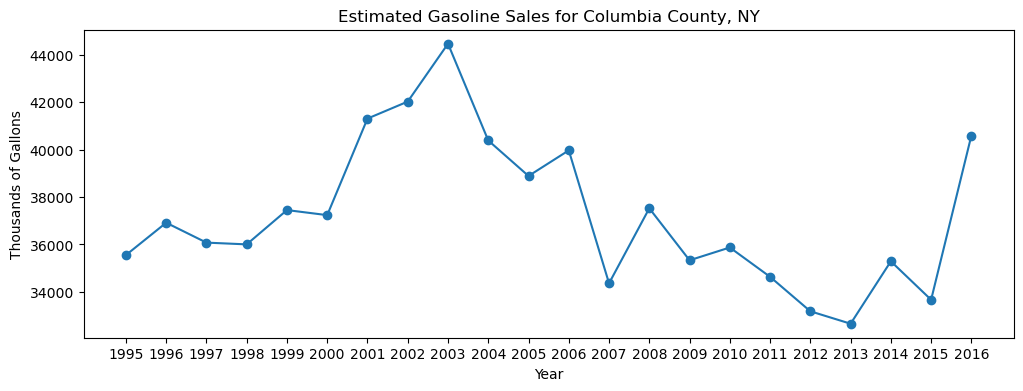

In [18]:
# Note: Code in this cell is complete. Make sure to understand the code before running. 

# Plot the Estimated sales for Columbia County from 1995 - 2016
# Modify the Figure to fit all years on x-axis
plt.rcParams["figure.figsize"] = (12,4)

# Create a title and labels
plt.title("Estimated Gasoline Sales for Columbia County, NY")
plt.xlabel("Year")
plt.ylabel("Thousands of Gallons")

# Sort the col_co DataFrame on year by ascending order. 
col_co_df = col_co_df.sort_values(by=["Year"])

# Plot the data using plot and scatter on the same figure. 
plt.plot(col_co_df["Year"], col_co_df["Estimated Sales"])
plt.scatter(col_co_df["Year"], col_co_df["Estimated Sales"])

# Show the plot
plt.show()


<h3>Working with APIs</h3>

In the previous sections of this Case Study you accessed data by making <b><i>HTTP Requests</i></b> using <b><i>urllib</i></b> and <b><i>requests</i></b>. In this section you will work with the <b><i>Socrata Open Data API</i></b> to access the <b><i>Estimated Gasoline Sales</i></b> dataset in two additional formats:<b><i>csv</i><b> and as a <b><i>binary stream</i></b>. 

<h4><u>Socrata Open Data and Estimated Gasoline Sales as CSV</u></h4>

In addition to returning the <b><i>Estimated Gasoline Sales</i></b> data as <b><i>JSON</i></b>, it can also be returned in <b><i>csv</i></b> format. First we'll specify the <b><i>base_url</i></b> variable. <b><i>Base_url</i></b> contains the specified url to request data from, <span class="str">https://data.ny.gov</span>. It then specifies the resource of interest, <span class="str">cwrk-j5nn</span> which is the unique identifier for the <b><i>Estimated Gasoline Sales</i></b> dataset.


In [19]:
# Set the base url for all requests regarding the Estimated Gasoline Sales data through the Socrata Open Data API. 
# You will append all other parts of the request to the API to this base_url. Do not modify this variable. 
base_url = "https://data.ny.gov/resource/cwrk-j5nn"

Now that the <b><i>base_url</i></b> has been specified, it can be appended based on the <b><i>Socrata Open Data API</i></b>. More information can be found on the <b><i>Socrata Open Data</i></b> <a href = "https://dev.socrata.com/consumers/getting-started.html">here</a>. 

A <span class="bltn">try and except </span> block is created to make the request using <b><i>urllib</i></b> <b>urlopen</b> method. To specify that the response should be <b><i>csv</i></b> <span class="str">.csv</span> is appended to <b><i>base_url</i></b>. The <span class="str">?</span>character is used to <b><i>filter</i></b> the returned response. In this example, only data on Columbia county should be returned by appending <span class="str">?county=Columbia</span> after <span class="str">csv</span>. The returned response is then read into a variable <b><i>respone</i></b> using <b>.read()</b> and the request closed using <b>.close</b>. 

<b><i>Remember to only run the Code cell below one time to avoid making multiple repeated requests to the server. </i></b>

In [20]:
# Note: Code in this cell is complete. Make sure to understand the code before running. 

# Return all records in which the county is Columbia as a csv. Use urllib to do this. 
try: 
    html_page = urlopen((base_url+ ".csv?" + "county=Columbia")) 
    response = html_page.read()
    
    html_page.close()
except (HTTPError, URLError) as e: 
    print(e) 

Let's see what the <span class="bltn">type</span> of the <b><i>response</i></b> variable is and <span class="bltn">print</span> the contents of it. 

In [21]:
# Print the data type of the response
print(type(response))
# Print the response
print(response)


<class 'bytes'>
b'"year","county","estimated_sales"\n"2016","Columbia","40589"\n"2015","Columbia","33670"\n"2014","Columbia","35291"\n"2013","Columbia","32661"\n"2012","Columbia","33185"\n"2011","Columbia","34637"\n"2010","Columbia","35873"\n"2009","Columbia","35334"\n"2008","Columbia","37524"\n"2007","Columbia","34364"\n"2006","Columbia","39965"\n"2005","Columbia","38886"\n"2004","Columbia","40381"\n"2003","Columbia","44458"\n"2002","Columbia","42020"\n"2001","Columbia","41304"\n"2000","Columbia","37236"\n"1999","Columbia","37449"\n"1998","Columbia","36004"\n"1997","Columbia","36078"\n"1996","Columbia","36916"\n"1995","Columbia","35553"\n'


We can see that the data <span class="bltn">type</span> of <b><i>response</i></b> is of type <b>bytes</b>. When the <b><i>response</i></b> is <span class="bltn">printed</span> the results appear similar to the <b><i>csv</i></b> format we have seen previously. Values are seperated by a <span class="str">,</span> and the end each row of the data is specified by the <span class="str">\n<span> new line character. 

<h4><u>Reading a Bytes object into a Pandas DataFrame</u></h4>

By consulting the <a href = "https://docs.python.org/3/howto/urllib2.html">Python urllib2 HOWTO Documentation</a> we can find out more information on the <b><i>response</i></b> variable's <b><i>Bytes-like</i></b> data <span class="bltn">type</span>; more specifically it is a <b><i>file-type</i></b> object. 

In order to be read into a <b><i>pandas DataFrame</i></b> the <b><i>file-type</i></b> Object <b><i>response</i></b> must be convereted to a <b><i>Bytes</i></b> object using Python's <b><i>BytesIO</i></b> found in the <b><i>io</i></b> module. By consulting the <a href="https://docs.python.org/3/library/io.html">Python io Documentation</a> we can see that by passing <b><i>response</i></b> as an argument to a <b><i>BytesIO</i></b> object, the returned result will be a <b><i>Bytes</i></b> object. This <b><i>BytesIO</i></b> object can then be passed to pandas <b>read_csv</b> method. The Code cell below is based on the <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html">pandas IO tools Documentation</a>, which in addition to working with <b><i>Byte</i></b> objects, shows how many different file types can be read into pandas. 

In [22]:
from io import BytesIO

# Conversion to BytesIO based on: https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html
# Store the binary stream in buffer
buffer_obj = BytesIO(response)

# Read into pandas DataFrame using read_csv. This works because read_csv can take a file path or a buffer per its doc. 
col_df_new = pd.read_csv(buffer_obj)

# Close the buffer 
buffer_obj.close()

# Show the first 3 rows of the col_df_new DataFrame
print(col_co_df.head(3))

      Year    County  Estimated Sales
1248  1995  Columbia          35553.0
1189  1996  Columbia          36916.0
1130  1997  Columbia          36078.0


<h4><u>Accessing the Socrata Open Data API with SodaPy</u></h4>

Many API's have user-created libraries that help make the API easier to use. This is also the case with the <b><i>Socrata Open Data API</i></b> which has the Python library <b><i>sodapy</i></b>. More information on the <b><i>sodapy</i></b> library can be found <a href = "https://github.com/xmunoz/sodapy">here</a>. 

Sodapy simplifies the process of requesting data using the <b><i>Socrata Open Data</i></b> API by handling the HTTP request details. First <b><i>Socrata</i></b> needs to be <span class="bltn">imported from </span> the <b><i>sodapy</i></b> library. A <b><i>Socrata</i></b> object can then be created specifying the <b><i>base url</i></b> to connect to, in this case <span class="str">data.ny.gov</span> and the API key if needed. The <b><i>Socrata</i></b> object's <b>.get</b> method is then used to specify the specific resource (<span class="str">cwrk-j5nn</span>) and specify what to return. 

The code in the cell below is based on the <a href = "https://github.com/xmunoz/sodapy/tree/master/examples">sodapy library's examples found on GitHub</a>. Additional information on how sodapy can be used can be found in the <a href = "https://github.com/xmunoz/sodapy">library's GitHub</a>. 

In [23]:
# Note: Code in this cell is complete. Make sure to understand the code before running. 
# Code based on: https://github.com/xmunoz/sodapy/tree/master/examples

# Use Socrata and sodapy to access Estimated gas sales data
from sodapy import Socrata


# Create a Socrata object specifying the url to connect to as client
client = Socrata("data.ny.gov", None)

# Specify the identifier of the Estimated gas sales data. 
# Return results where the year is after 2000, the estimated yearly sale is more than 100,000 and 
# the county name is not Statewide Total or New York State. 
results = client.get("cwrk-j5nn", where = "year > 2000 AND estimated_sales > 100000 AND (county != 'Statewide Total' AND county != 'New York State' )")

<h4><u>Examining the Socrata Object</u></h4>

Previously when the Socrata Open Data API was queried using urllib, the resulting object was returned as a <b><i>byte-like</i></b> object. The sodapy library returns the results as a <span class="bltn">list</span> instead. Similar to how <b><i>ByteIO</i></b> was used above to convert the returned response into a <b><i>Byte</i></b> object, <b><i>sodapy</i></b> has taken additional steps to convert the response to a <span class="bltn">list</span>. 

Let's <span class="bltn">print</span> the <span class="bltn">type</span> of the <b><i>results</i></b> variable. 

In [24]:
# Print the data type of the returned results 
print(type(results))

<class 'list'>


<h4><u>Sodapy and Pandas</u></h4>

Since the returned response is stored as a <span class="bltn">list</span> from using <b><i>sodapy's Socrata</i></b> object, it is easy to read <b><i>results</i></b> into a <b><i>pandas DataFrame</i></b> by using <b><i>DataFrame's</i></b> <b>from_records</b> method. 

In [25]:
# Store the returned results list as a pandas DataFrame by using pd.DataFrame.from_records(results)
gas_results_df = pd.DataFrame.from_records(results)

# Display the first three rows.
gas_results_df.head(3)

,year,county,estimated_sales
0,2013,Dutchess,100123
1,2007,Saratoga,100318
2,2016,Broome,100367


In the <span class="yt">Your Turn's</span> below, you will practice reading a provided <b><i>JSON</i></b> file, making HTTP requests using a library of your choice, create and parse a <b><i>BeautifulSoup</i></b> object, and work more with <b><i>sodapy</i></b> and the <b><i>Socrata Open Data</i></b> API. 

<h3 class="yt">Your Turn: 1</h3>
Read in <b><i>JSON</i></b> file <b><i>gas_sales_50.json</i></b> which contains the first 50 results returned from the Estimated gasoline sales dataset and store the result as a <b><i>pandas DataFrame</i></b>. <span class="bltn">Print</span> the <span class="num">last three rows</span> of the <b><i>DataFrame</i></b> you just created.

In [34]:
# Your Turn 1 - 
df = pd.read_json('Data/gas_sales_50.json')
print(df.tail(3))

    year    county  estimated_sales
47  2016     Tioga            21345
48  2016  Tompkins            33335
49  2016    Albany           131898


<h3 class="yt">Your Turn: 2</h3>
Using either <b><i>urllib</i></b> or <b><i>requests</i></b> library, open https://www.google.com and store the response as a <b><i>BeautifulSoup</i></b> object. <span class="bltn">Print</span> the <b><i>title element</i></b> of the webpage. 

In [53]:
# Your Turn 2 -
# String of the URL to open. 
google_url = "https://www.google.com"

# Create Request object and pass the goolge_url to it. 
greq = Request(google_url)

try:
    # Open the url (Send HTTP request) using urlopen(req)
    gresponse = urlopen(greq)
    
    # Read in the html page using response.read()
    home_page = gresponse.read()

    # Terminate connection using response.close()
    gresponse.close()
    
except HTTPError as e:
    print("HTTP Error: ", e.code)
except URLError as e:
    print("URL Error: ", e.reason)

# Create BeautifulSoup object and pass the text response. Hint: BeautifulSoup(html_page, 'html.parser')
gsoup_obj = BeautifulSoup(home_page, 'html.parser')

# Access the BeautifulSoup object's contents and display in an easy-to-read format using .prettify()
pr_gsoup_obj = gsoup_obj.prettify

# Print the prettify() result
print(gsoup_obj.title.text)


Google


<h3 class="yt">Your Turn: 3</h3>
Using <b><i>sodapy's Socrata</i></b> object access the <b><i>Estimated gasoline sales</i></b> dataset. Query the dataset to return records in which the <span class="str">estimated sales is < 5,000 </span>. Store the results and  <span class="bltn">print</span> the <span class="num">number of records that are returned</span>. 

In [62]:
# Your Turn 3- 
# Use Socrata and sodapy to access Estimated gas sales data
from sodapy import Socrata


# Create a Socrata object specifying the url to connect to as client
ytclient = Socrata("data.ny.gov", None)

# Specify the identifier of the Estimated gas sales data. 
# Return results where the estimated sales is < 5000
ytresults = ytclient.get("cwrk-j5nn", where = "estimated_sales < 5000")
print(type(ytresults))
# for lists, use len() to find the number of elements
len(ytresults)

<class 'list'>


22

<h3 class="yt">Your Turn: 4</h3>
Store the results from <span class="yt">Your Turn 3</span> as a <b><i>pandas DataFrame</i></b>. Using your newly created <b><i>DataFrame</i></b> display all rows that have a <span class="str">year value that occured after 2010</span>. 

In [82]:
# Your Turn 4 - 
yt = pd.DataFrame.from_records(ytresults)

after = yt[yt['year'] > '2010']

print(after)



    year    county estimated_sales
1   2012  Hamilton            2210
2   2013  Hamilton            2277
4   2011  Hamilton            2484
6   2014  Hamilton            2811
11  2016  Hamilton            3139
13  2015  Hamilton            3191
